# Module 2: Data Exploration

## Table of Contents

<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

## 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

## 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [4]:
# January data set
taxi_jan_2019 = pd.read_csv("data/yellow_tripdata_2019-01.csv")

# Framework for merging February, March, ... data sets with the above
taxi_data = pd.concat([taxi_jan_2019])

In [5]:
# print number of data items and series
print(taxi_data.shape)

# Display first 5 rows of data frame
taxi_data.head()

(7667792, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

We first want to look at the columns in our data set, and remove columns which are redundant in our analysis.

In [6]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

By looking at the data dictionary for this data set, we can make judgements on which series are useful and which series are not useful in our analysis. We are looking to predict the average taxi driver income. Upon observation, the data set should be reduced as follows:

In [7]:
taxi_data = taxi_data[["tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count",
                       "trip_distance", "RatecodeID", "PULocationID", "DOLocationID",
                       "payment_type", "total_amount"]]

Let's look at the reduced data set:

In [8]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


To get a better sense of the remaining data, we can plot each column in a histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029974D09488>,
      dtype=object)

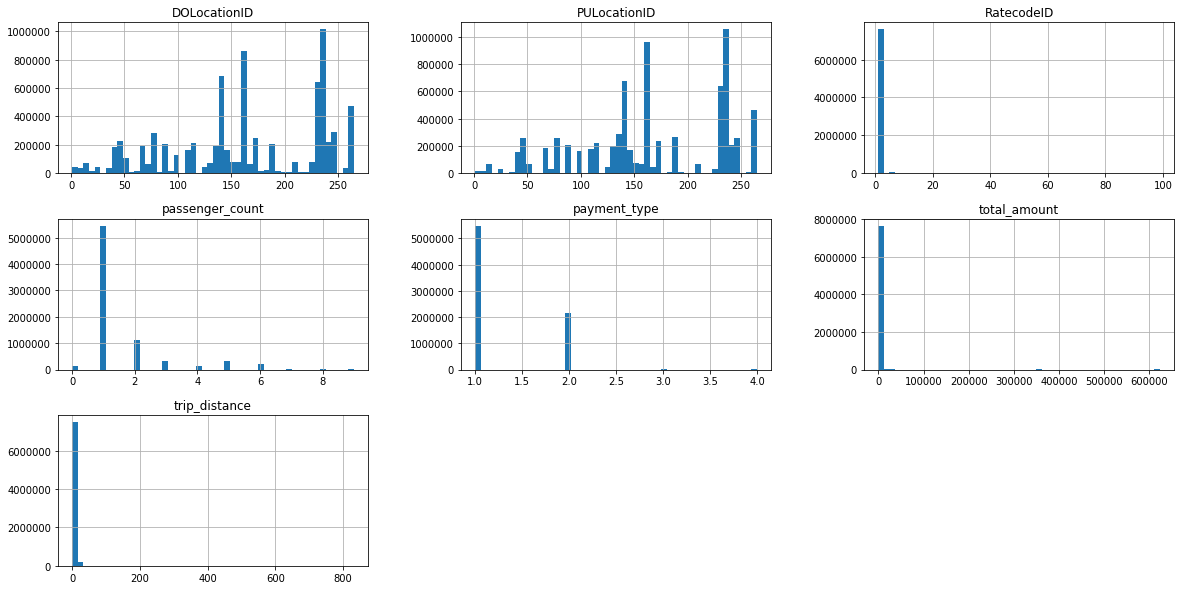

In [14]:
taxi_data.hist(figsize=(20,10),bins=50)

We can see obvious outliers in the RatecodeID and total_amount plots. From the data dictionary, we know that the RatecodeID can only take a categorical value from 1 to 6, and so the presence of values $>6$ and $<100$ suggests data entry error. Likewise, the likelihood of somebody paying over $£600000$ for a taxi ride is very slim.

In [16]:
taxi_data["RatecodeID"].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

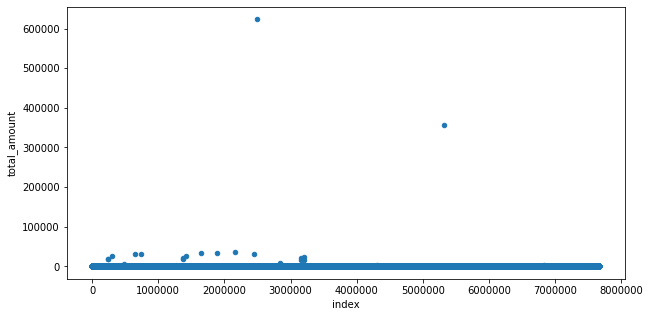

In [17]:
taxi_data.reset_index().plot(kind = "scatter", x = "index", y = "total_amount", figsize = (10,5))

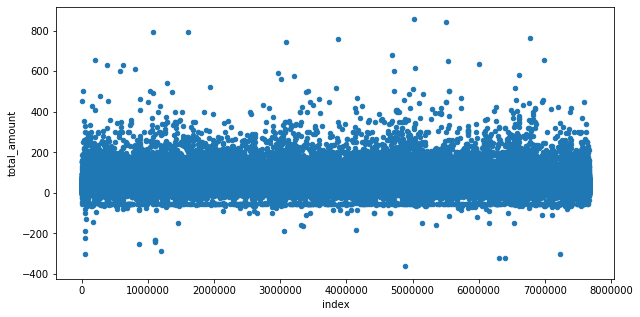

In [18]:
taxi_data[taxi_data["total_amount"] < 1000].reset_index().plot(kind = "scatter",
                                                               x = "index", y = "total_amount", figsize = (10,5))

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

## 7.1. Decision tree <a id='decision_tree'></a>

## 7.2. Random forest <a id='random_forest'></a>

## 7.3. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)